In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

# Paintings

## Get data

### Import data in your notebook

In [2]:
from vincentvanbot.data import get_data_locally
from vincentvanbot.preprocessing.utils import jpg_to_array
from sklearn.pipeline import Pipeline
from vincentvanbot.preprocessing.imagevectorizer import ImageVectorizer
from vincentvanbot.preprocessing.imageresizer import ImageResizer
import cv2
from vincentvanbot.preprocessing.utils import get_jpg_link
from vincentvanbot.preprocessing.pipeline import build_pipe

In [3]:
df = get_data_locally()
pipe = build_pipe(dim=(420,360))
df_transformed = pipe.fit_transform(df)
df_transformed.shape

(10, 12)

In [4]:
df_transformed.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,IMAGE
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650,"[[[109, 106, 87], [116, 113, 94], [111, 108, 8..."
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650,"[[[95, 89, 77], [81, 76, 64], [68, 65, 53], [5..."
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650,"[[[125, 104, 59], [94, 72, 37], [63, 39, 16], ..."
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/art/a/aachen/antiope.jpg,painting,mythological,German,1601-1650,"[[[56, 49, 43], [49, 42, 36], [63, 56, 50], [7..."
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/art/a/aachen/athena.jpg,painting,mythological,German,1601-1650,"[[[98, 86, 65], [82, 71, 63], [66, 55, 57], [4..."


### Built KNN

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
#print original shape of an image
X = df_transformed['IMAGE'].iloc[:,]
X

0    [[[109, 106, 87], [116, 113, 94], [111, 108, 8...
1    [[[95, 89, 77], [81, 76, 64], [68, 65, 53], [5...
2    [[[125, 104, 59], [94, 72, 37], [63, 39, 16], ...
3    [[[56, 49, 43], [49, 42, 36], [63, 56, 50], [7...
4    [[[98, 86, 65], [82, 71, 63], [66, 55, 57], [4...
5    [[[37, 21, 22], [38, 22, 22], [39, 24, 21], [4...
6    [[[5, 3, 6], [5, 3, 6], [5, 3, 6], [5, 3, 6], ...
7    [[[31, 25, 22], [28, 22, 19], [30, 24, 20], [2...
8    [[[47, 41, 29], [47, 41, 29], [47, 41, 29], [4...
9    [[[122, 120, 121], [67, 65, 66], [17, 15, 16],...
Name: IMAGE, dtype: object

In [7]:
for i in df_transformed['IMAGE']:
    X_flat = i.reshape(10, -1)
    #X_flat = X_flat[1]
X_flat.shape

(10, 45360)

In [8]:
#df_transformed.images is a numpy array with 10 numpy arrays 360X420 (feature vectors) representing digits
#df_transformed.target ???

In [9]:
model = NearestNeighbors(n_neighbors=2)
model.fit(X_flat)
NearestNeighbors(n_neighbors=2)

A = model.kneighbors_graph(X_flat)
A.toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [60]:
from scipy.spatial import distance
from igraph import *


graph = Graph(directed=True)
graph.add_vertices(len(df_transformed['IMAGE']))

for i in range(len(df_transformed['IMAGE'])):
    distances = [distance.cosine(X_flat[i], feat) for feat in X_flat] #compute distance
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:6] #order and return the indexes of 5 most similar images
    print(idx_closest)
    for j in idx_closest:
        graph.add_edge(i, j, weight=distances[j])
    
summary(graph)

[6, 4, 5, 2, 1]
[7, 4, 5, 6, 0]
[6, 0, 1, 5, 9]
[6, 0, 1, 9, 7]
[1, 0, 6, 9, 5]
[9, 1, 0, 6, 7]
[0, 2, 1, 5, 9]
[1, 0, 8, 5, 6]
[7, 5, 9, 6, 1]
[5, 6, 0, 4, 8]
IGRAPH D-W- 10 50 -- 
+ attr: weight (e)


<class 'numpy.ndarray'> (1600, 1193, 3)


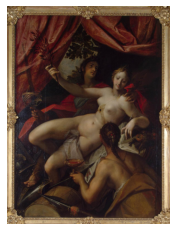

In [56]:
# grab a random image
def load_image():
    random_img_html = df_transformed.iloc[np.random.randint(0,len(df_transformed))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)

    print(type(random_img_arr), random_img_arr.shape)

    # display  image
    plt.imshow(random_img_arr)
    plt.axis('off');

load_img()

In [62]:
# load all the similarity results as thumbnails of height 100
from keras.preprocessing import image


#load_img(len(df_transformed)[idx])
thumbs = []
for idx in idx_closest:
    img = image.load_img(df_transformed[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

    
# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

KeyError: 5

In [ ]:
idx1 = int(len(df_transformed['IMAGE']) * random.random())

# run get_shortest_paths
path = graph.get_shortest_paths(idx1, mode=OUT, output='vpath', weights='weight')[0]

# retrieve the images and display them
#results_image = 
plt.figure(figsize = (16,12))
#imshow(results_image)

In [ ]:
idx2 = df_transformed['IMAGE'].iloc[1].reshape((10, -1))

model.kneighbors(idx2,n_neighbors=2) # Return distances and index of the 2 closest points

In [ ]:
avg_scores = []  # average score for different k

max_k = 10
cv = 10

# loop over different values of k
for k in range(1, max_k):
  # create knn classifier with k = k
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

  # cross-validate knn on training sample with no_folds
  scores = cross_val_score(knn, data_train, label_train,
                           cv=cv, scoring='accuracy')

  # add avg accuracy to score table
  avg_scores.append(scores.mean())